# 2021-01-14_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474_rep3

Brief experiment description:

* 1:150 1.5 hours, 1:750 5 hours, 100 into 200 uL PBS for cyt.
* Testing relative levels of RPU construct in each landing pad
* All strains are sequence confirmed

Experimental variables:
* Which landing pad contains PJ23101-YFP
    - determined by strain number

Notes on experiment:

* FITC-A is the output channel (YFP)

### Strains

#### Experiment
| strain number | parent strain | Description               | 
|---------------|---------------|-------------------------------|
| AJT472  | EcN | PJ23101-YFP in LPattB5     |
| AJT473  | EcN | PJ23101-YFP in LPattB2     |
| AJT474  | EcN | PJ23101-YFP in LPattB7     |   


### Protocol

 - Overnight in M9 + kan
 - M9
     * Dilute 1:150 in 500 uL deep-well plate, grow for 1.5 hours
     * Dilute 1:750 into 500 uL in deep-well plate, grow for 5 hours
         - cells were a little dilute at end
     * 100 uL culture into 200 uL PBS + kan

In [5]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

# Set the default sans-serif font to Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Set to always use sans-serif fonts
matplotlib.rcParams['font.family'] = "sans-serif"

In [6]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D

# Dan's custom scripts that aid in importing from conditions.csv file
sys.path.append('/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules')
import cf_imports
import cf_helpers

In [7]:
# Import reloads for when modules are being changed
import importlib
importlib.reload(cf_imports)
importlib.reload(cf_helpers)

<module 'cf_helpers' from '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules/cf_helpers.py'>

## Data Import

In [8]:
# Provide full path to flow cytometry .fcs file directory and pass to fixer
fcs_dir = cf_imports.dir_fix(
    r'/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/2021-01-14_EcN_LPs_RelativeExpression_M9_300minInduction_rep3/2021-01-14_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474')
# Optional specification of conditions directory (default to same directory as data)
conds_dir = None



In [9]:
# Create experiment from fcs files and conditions file ()
exp = cf_imports.exp_from_dirs(fcs_dir, conds_dir)

['/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-14_EcN_LPs_RelativeExpression_M9_300minInduction_rep3/2021-01-14_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474/Specimen_001_A1_A01.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-14_EcN_LPs_RelativeExpression_M9_300minInduction_rep3/2021-01-14_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474/Specimen_001_A2_A02.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-14_EcN_LPs_RelativeExpression_M9_300minInduction_rep3/2021-01-14_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474/Specimen_001_A3_A03.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-14_EcN_LPs_RelativeExpression_M9_300minInduction_rep3/2021-01-14_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474/Specimen_001_A4_A04.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/

In [10]:
# Check dataframe 
exp.data.head(10)
# exp2.data.head(10)
# exp3.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num
0,865.830017,891.0,8240.490234,8179.0,-8.14,43.0,-47.939999,53.0,16471.230469,17388.0,51.000000,1,0.0,M9,EcN,3,A,1,AJT472-1
1,845.369995,839.0,10024.310547,9370.0,4.44,29.0,18.360001,48.0,2913.689941,4519.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1
2,1076.010010,1061.0,10100.150391,11912.0,15.54,29.0,-2.040000,32.0,27094.621094,28149.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1
3,906.750000,1024.0,9213.770508,8393.0,-7.40,17.0,68.339996,33.0,22140.509766,23412.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1
4,956.970032,1030.0,8396.120117,6703.0,-0.74,21.0,-69.360001,53.0,26983.019531,27419.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1
5,662.160034,740.0,9105.540039,9844.0,23.68,36.0,59.160000,51.0,19390.500000,20819.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1
6,1740.030029,1426.0,10427.209961,7663.0,0.74,24.0,29.580000,53.0,45508.621094,43839.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1
7,4732.770020,3351.0,10950.980469,6954.0,38.48,45.0,21.420000,32.0,124648.828125,82387.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1
8,1122.510010,1203.0,9886.060547,8958.0,-1.48,27.0,20.400000,38.0,30070.621094,30446.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1
9,2188.290039,1190.0,22928.169922,12587.0,-3.70,21.0,49.980000,33.0,54432.902344,34635.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1


In [11]:
exp.data.groupby(['parent_strain','strain_num', 'iptg']).size()
# exp2.data.groupby(['parent_strain','strain_num', 'iptg']).size()
# exp3.data.groupby(['parent_strain','strain_num', 'iptg']).size()

parent_strain  strain_num  iptg
EcN            AJT472-2    0.0     59977
               AJT472      0.0     58358
               AJT473-2    0.0     43491
               AJT474-1    0.0     62608
               AJT473-1    0.0     65170
               AJT474      0.0     61644
               AJT473      0.0     59919
               AJT472-1    0.0     60349
               AJT474-2    0.0     60139
               blank       0.0     56881
dtype: int64

## Gating

### FSC / SSC

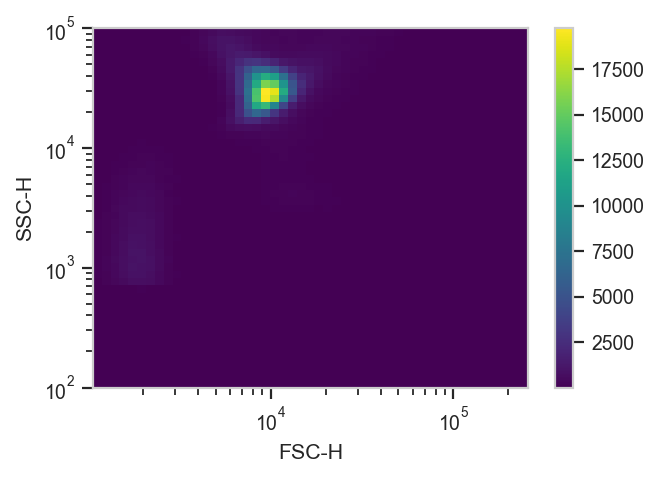

In [12]:
scatter = flow.DensityView(
    xchannel = "FSC-H",
    ychannel = "SSC-H",
    yscale = "log",
    xscale = "log")

scatter.plot(exp, ylim=(100,100000))

Gate FSC-A / SSC-A w/ Guassian w/ 2 sigma stddeviation

In [13]:
g2 = flow.PolygonOp(name = "Debris_Filter",
                    xchannel = "FSC-H",
                    ychannel = "SSC-H",
                    xscale = 'log',
                    yscale = 'log')

g2.vertices = [(4000, 10000), # bottom left
             (18000, 18000), # bottom right
             (18000, 55000), # top right
             (4000, 35000)] # top left

In [14]:
# for polygon gating as opposed to using Gaussian mixture model
exp_gated = g2.apply(exp)

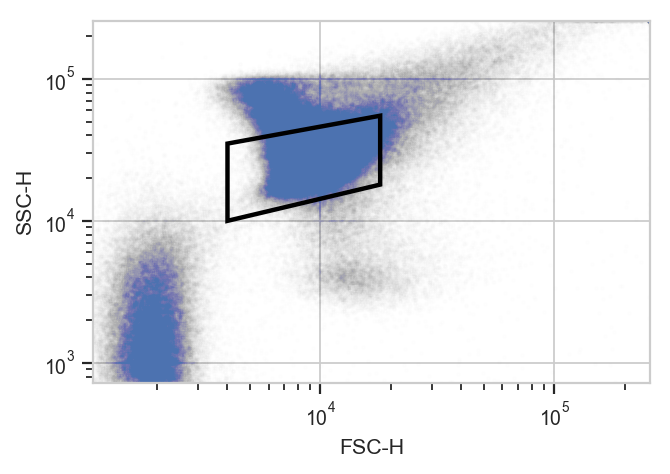

In [15]:
# takes a minute or two to run
g2.default_view().plot(exp_gated, alpha = 0.002)

In [16]:
exp_gated.data.head(10)
# exp2_gated.data.head(10)
# exp3_gated.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num,Debris_Filter
0,865.830017,891.0,8240.490234,8179.0,-8.14,43.0,-47.939999,53.0,16471.230469,17388.0,51.000000,1,0.0,M9,EcN,3,A,1,AJT472-1,True
1,845.369995,839.0,10024.310547,9370.0,4.44,29.0,18.360001,48.0,2913.689941,4519.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1,False
2,1076.010010,1061.0,10100.150391,11912.0,15.54,29.0,-2.040000,32.0,27094.621094,28149.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1,True
3,906.750000,1024.0,9213.770508,8393.0,-7.40,17.0,68.339996,33.0,22140.509766,23412.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1,True
4,956.970032,1030.0,8396.120117,6703.0,-0.74,21.0,-69.360001,53.0,26983.019531,27419.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1,True
5,662.160034,740.0,9105.540039,9844.0,23.68,36.0,59.160000,51.0,19390.500000,20819.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1,True
6,1740.030029,1426.0,10427.209961,7663.0,0.74,24.0,29.580000,53.0,45508.621094,43839.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1,False
7,4732.770020,3351.0,10950.980469,6954.0,38.48,45.0,21.420000,32.0,124648.828125,82387.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1,False
8,1122.510010,1203.0,9886.060547,8958.0,-1.48,27.0,20.400000,38.0,30070.621094,30446.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1,True
9,2188.290039,1190.0,22928.169922,12587.0,-3.70,21.0,49.980000,33.0,54432.902344,34635.0,51.099998,1,0.0,M9,EcN,3,A,1,AJT472-1,True


In [17]:
# should use Debris_Filter_2 if using Gaussian Mixture Model, otherwise Debris_Filter
exp_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'iptg']).size()
# exp2_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'iptg']).size()

Debris_Filter  parent_strain  strain_num  media  iptg
False          EcN            AJT472-2    M9     0.0     13382
                              AJT472      M9     0.0     12850
                              AJT473-2    M9     0.0     13683
                              AJT474-1    M9     0.0     17089
                              AJT473-1    M9     0.0     22732
                              AJT474      M9     0.0     16084
                              AJT473      M9     0.0     17104
                              AJT472-1    M9     0.0     14165
                              AJT474-2    M9     0.0     14578
                              blank       blank  0.0     47320
True           EcN            AJT472-2    M9     0.0     46595
                              AJT472      M9     0.0     45508
                              AJT473-2    M9     0.0     29808
                              AJT474-1    M9     0.0     45519
                              AJT473-1    M9     0.0     42438
 

In [18]:
exp_gated_df = exp_gated.data
# exp2_gated_df = exp2_gated.data

filtered  = exp_gated_df[(exp_gated_df['Debris_Filter']==True)&(exp_gated_df['strain_num']!='blank')]
#picked debris filter that looked best qualitatitvely and excluded blank wells

# filtered.head(10)
filtered.tail(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num,Debris_Filter
585350,1020.210022,911.0,15863.200195,14611.0,-20.720001,19.0,27.539999,63.0,39827.250000,38391.0,883.000000,5,0.0,M9,EcN,3,C,17,AJT474-2,True
585351,744.929993,795.0,7639.300293,6695.0,-9.620000,29.0,-21.420000,41.0,34556.941406,31955.0,883.000000,5,0.0,M9,EcN,3,C,17,AJT474-2,True
585352,849.090027,922.0,8406.390625,7718.0,-0.740000,36.0,-18.360001,44.0,34709.460938,33094.0,883.099976,5,0.0,M9,EcN,3,C,17,AJT474-2,True
585353,648.210022,575.0,8568.339844,8979.0,6.660000,19.0,25.500000,43.0,24504.570312,23299.0,883.099976,5,0.0,M9,EcN,3,C,17,AJT474-2,True
585354,850.020020,849.0,5841.260254,6844.0,-32.560001,21.0,80.580002,49.0,36349.980469,33521.0,883.099976,5,0.0,M9,EcN,3,C,17,AJT474-2,True
585355,652.859985,677.0,9682.240234,9589.0,37.000000,40.0,58.139999,47.0,24206.970703,23554.0,883.099976,5,0.0,M9,EcN,3,C,17,AJT474-2,True
585356,1165.290039,1095.0,11554.540039,8906.0,35.520000,40.0,7.140000,33.0,39983.492188,37114.0,883.099976,5,0.0,M9,EcN,3,C,17,AJT474-2,True
585357,743.070007,765.0,12490.690430,11913.0,-13.320000,7.0,45.899998,52.0,35387.429688,33994.0,883.099976,5,0.0,M9,EcN,3,C,17,AJT474-2,True
585359,975.570007,874.0,9844.980469,9606.0,-5.180000,22.0,44.879997,62.0,32304.480469,31494.0,883.200012,5,0.0,M9,EcN,3,C,17,AJT474-2,True
585360,987.660034,904.0,9716.209961,8628.0,34.779999,20.0,-43.860001,28.0,33559.980469,31628.0,883.200012,5,0.0,M9,EcN,3,C,17,AJT474-2,True


# Start from here

In [19]:
## pickle allows you to save an object as binary so it can be re-opened next time without re-running
## all of the code that loaded it

pickle.dump(exp_gated_df, open("pickledata_gated.p", "wb")) # wb is for writing binary
# exp_gated_df = pickle.load(open("pickledata_gated.p", "rb")) # rb is for reading binary

# # pickle.dump(exp2_gated_df, open("pickledata2_gated.p", "wb")) # wb is for writing binary
# exp2_gated_df = pickle.load(open("pickledata2_gated.p", "rb")) # rb is for reading binary

pickle.dump(filtered, open("pickledata_filtered.p", "wb")) # wb is for writing binary
# filtered = pickle.load(open("pickledata_filtered.p", "rb")) # rb is for reading binary

## Calculating Medians

In [20]:
parent = sorted(filtered['parent_strain'].unique()) # get strain numbers in experiment
print(parent)

['EcN']


In [21]:
strains = sorted(filtered['strain_num'].unique()) # get strain numbers in experiment
print(strains)

['AJT472', 'AJT472-1', 'AJT472-2', 'AJT473', 'AJT473-1', 'AJT473-2', 'AJT474', 'AJT474-1', 'AJT474-2']


In [22]:
media = sorted(filtered['media'].unique()) # get media used in experiment
print(media)

['M9']


In [23]:
data_dict = dict() # initiate dictionary

# make  nested dictionary with medians in it for each condition (media, inducer, concentration, strain)
for s in ['AJT472','AJT473','AJT474']:
    q = filtered.query('strain_num == "{}"'.format(s))
    data_dict[s] = q['FITC-A'].median()
    
data = pd.Series(data_dict)

In [24]:
# pickle.dump(data, open("data.p", "wb")) # wb is for writing binary

In [25]:
data_dict

{'AJT472': 1027.6500244140625,
 'AJT473': 1017.4199829101562,
 'AJT474': 882.5700073242188}

In [26]:
# # controls['M9']['EcN'].loc[[~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])],'AJT206']
# print(controls['M9']['EcN'].loc[:,'AJT206'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])])
# auto = (controls['M9']['EcN'].loc[:,'AJT206'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])]).mean(axis=0)


# # print(controls['M9']['EcN'].loc[:,'AJT280'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT280'])])
# # RPUg = (controls['M9']['EcN'].loc[:,'AJT280'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT280'])]).mean(axis=0)

%store -r AJT206_auto_store # from 2020-09-22_EcN_Sensors_AllReplicates_v2
# %store -r AJT280_RPUg_store # from 2020-09-22_EcN_Sensors_AllReplicates_v2
auto = AJT206_auto_store
# RPUg = AJT280_RPUg_store

print()
print(auto)
# print(RPUg)

no stored variable # from 2020-09-22_EcN_Sensors_AllReplicates_v2

33.25156319141388


In [27]:
data['AJT472']

1027.6500244140625

In [31]:
# AJT472_r3_au_store = data['AJT472']
# AJT473_r3_au_store = data['AJT473']
# AJT474_r3_au_store = data['AJT474']

# %store AJT472_r3_au_store
# %store AJT473_r3_au_store
# %store AJT474_r3_au_store


Stored 'AJT472_r3_au_store' (float64)
Stored 'AJT473_r3_au_store' (float64)
Stored 'AJT474_r3_au_store' (float64)


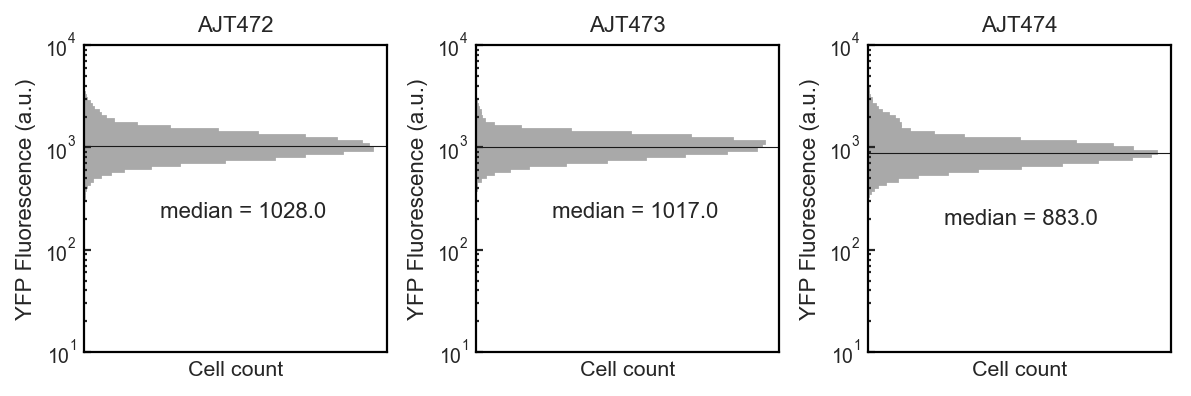

In [29]:
## Histogram-style transfer functions like in Cello SI

data_his_dict = dict() # initiate dictionary

fig_his, ax_his = plt.subplots(1,3, figsize=(7.5,2.5)) # row, column format
plt.tight_layout() #tidies up spacing between plots

strains_subset = ['AJT472','AJT473','AJT474']

for s in strains_subset:
    q = filtered.query('strain_num == "{}"'.format(s))
    data_his_dict[s] = q['FITC-A']
                    
    FP = ax_his[strains_subset.index(s)]

    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

#                 print(strains_subset.index(s), inducer_info[i]['conc'].index(c))
    logbins = np.geomspace(10,10000,100)
    FP.hist(q['FITC-A'], 
               bins = logbins, 
               orientation='horizontal',
               color = 'darkgray',
               edgecolor = 'darkgray',
               zorder=-1)
    FP.set_yscale('log')
    FP.set_ylim(10,10000)
    FP.tick_params(axis='both',which='both', 
                               bottom=False,top=False,
                               labelbottom=False,
                               right=False,left=False,
                               labelleft=False)
    FP.grid(False)
    FP.set_ylabel('YFP Fluorescence (a.u.)', size=10)
    FP.set_xlabel('Cell count')
    FP.set_title(s, size = 10)
    FP.tick_params(axis='y',which='major',left=True, length=3, width=1, labelleft=True, direction='in')
    FP.tick_params(axis='y',which='minor', left=True, length=1.5, width=1, direction='in')     
    
    xmin, xmax = FP.get_xlim()
    FP.set_xlim(xmin,xmax)
    FP.hlines(data[s],xmin,xmax, linewidth = 0.5)
    FP.text(xmax/4,data[s]/5,'median = {}'.format(round(data[s], 0)), size = 10)

                
                

In [30]:
# fig_his.savefig('RPUconstruct_RelativeExpressionAcrossLPs.pdf', bbox_inches = "tight", transparent = True)
